Creating a cluster dendogram to view how closely linked online stores are to physical stores


In [ ]:
# Add intial set of imports 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [ ]:
# Install Yahoo Finance for finacial data
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 14.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf

In [ ]:
# Adding in both online and instore companies to test with
amazon = yf.Ticker("AMZN").history(period='5y')
alibaba = yf.Ticker("BABA").history(period='5y')
ebay = yf.Ticker("EBAY").history(period='5y')
etsy = yf.Ticker("ETSY").history(period='5y')
gap = yf.Ticker("GPS").history(period='5y')
tkmax = yf.Ticker("TJX").history(period='5y')
costco = yf.Ticker("COST").history(period='5y')

Here we have the stock data for 4 online stores (amazon, ali-baba, ebay and etsy) and 3 in-person stores (gap, tk max and costco)

In [ ]:
# Instead of downloading all the OHLC data we are only going to look at the close data for each stock. The code below extracts that for us.
dfs=[] 
for x in ['AMZN','BABA','EBAY','ETSY','GPS','TJX','COST']:
  df = yf.Ticker(x).history(period='5y')
  df=df[['Close']]
  df['Name']=x
  dfs.append(df)

In [ ]:
# This stacks all the data ontop of each other
pd.concat(dfs)

,Close,Name
Date,,
2018-01-05 00:00:00-05:00,61.457001,AMZN
2018-01-08 00:00:00-05:00,62.343498,AMZN
2018-01-09 00:00:00-05:00,62.634998,AMZN
2018-01-10 00:00:00-05:00,62.716499,AMZN
2018-01-11 00:00:00-05:00,63.834000,AMZN
...,...,...
2022-12-28 00:00:00-05:00,452.989990,COST
2022-12-29 00:00:00-05:00,456.529999,COST
2022-12-30 00:00:00-05:00,456.500000,COST


In [ ]:
dfz=pd.DataFrame() 
for x in dfs:
  stock_name=x['Name'].values[0]
  stock_name=stock_name.replace('.','')
  x=x[['Close']]
  x.index=x.index.astype(str).str[:10]
  x.columns=[stock_name]
  dfz=x.join(dfz)

In [ ]:
dfz.to_csv('stockdata.csv')

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
stocks


,Date,COST,TJX,GPS,ETSY,EBAY,BABA,AMZN,COST_z_norm,TJX_z_norm,GPS_z_norm,ETSY_z_norm
0,2018-01-05,175.268005,36.001232,27.537575,20.250000,37.416405,190.699997,61.457001,-1.356450,-2.002401,1.305089,-1.277062
1,2018-01-08,175.949448,35.301277,27.326071,20.320000,37.520115,190.330002,62.343498,-1.350763,-2.070972,1.273496,-1.275989
2,2018-01-09,173.905060,35.231274,27.063812,20.900000,37.265572,190.800003,62.634998,-1.367827,-2.077830,1.234322,-1.267100
3,2018-01-10,173.092941,35.590584,27.097651,20.260000,35.540409,189.789993,62.716499,-1.374605,-2.042630,1.239377,-1.276909
4,2018-01-11,176.789658,35.875237,28.079023,20.559999,35.644104,188.750000,63.834000,-1.343750,-2.014744,1.385966,-1.272311
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2022-12-28,452.989990,78.690002,11.139867,120.400002,39.919998,87.199997,81.820000,0.961620,2.179630,-1.144273,0.257829
1254,2022-12-29,456.529999,79.339996,11.248405,122.680000,41.820000,89.129997,84.180000,0.991168,2.243307,-1.128060,0.292772
1255,2022-12-30,456.500000,79.599998,11.130000,119.779999,41.470001,88.089996,84.000000,0.990917,2.268779,-1.145747,0.248327
1256,2023-01-03,453.279999,79.010002,11.330000,113.559998,42.150002,91.980003,85.820000,0.964041,2.210979,-1.115872,0.153000


In [ ]:
stocks=pd.read_csv('stockdata.csv').dropna()
for x in stocks.columns[1:8]:
  stocks[x+'_z_norm']= (stocks[x] - stocks[x].mean())/stocks[x].std()
stock_stack=stocks.set_index('Date').stack().reset_index()
stock_stack.columns=['Date','Stock','Value']
stock_stack['Date']=pd.to_datetime(stock_stack['Date'])
stock_stack=stock_stack[stock_stack['Stock'].str.contains('z_norm')]
stock_stack.head()

,Date,Stock,Value
7,2018-01-05,COST_z_norm,-1.356450
8,2018-01-05,TJX_z_norm,-2.002401
9,2018-01-05,GPS_z_norm,1.305089
10,2018-01-05,ETSY_z_norm,-1.277062
11,2018-01-05,EBAY_z_norm,-0.613570


In [ ]:
TimeSeries=stock_stack.set_index(['Date','Stock']).unstack()['Value']
TimeSeries.columns=[i[:7] for i in TimeSeries.columns]

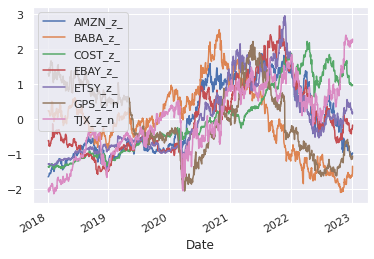

In [ ]:
TimeSeries.plot()

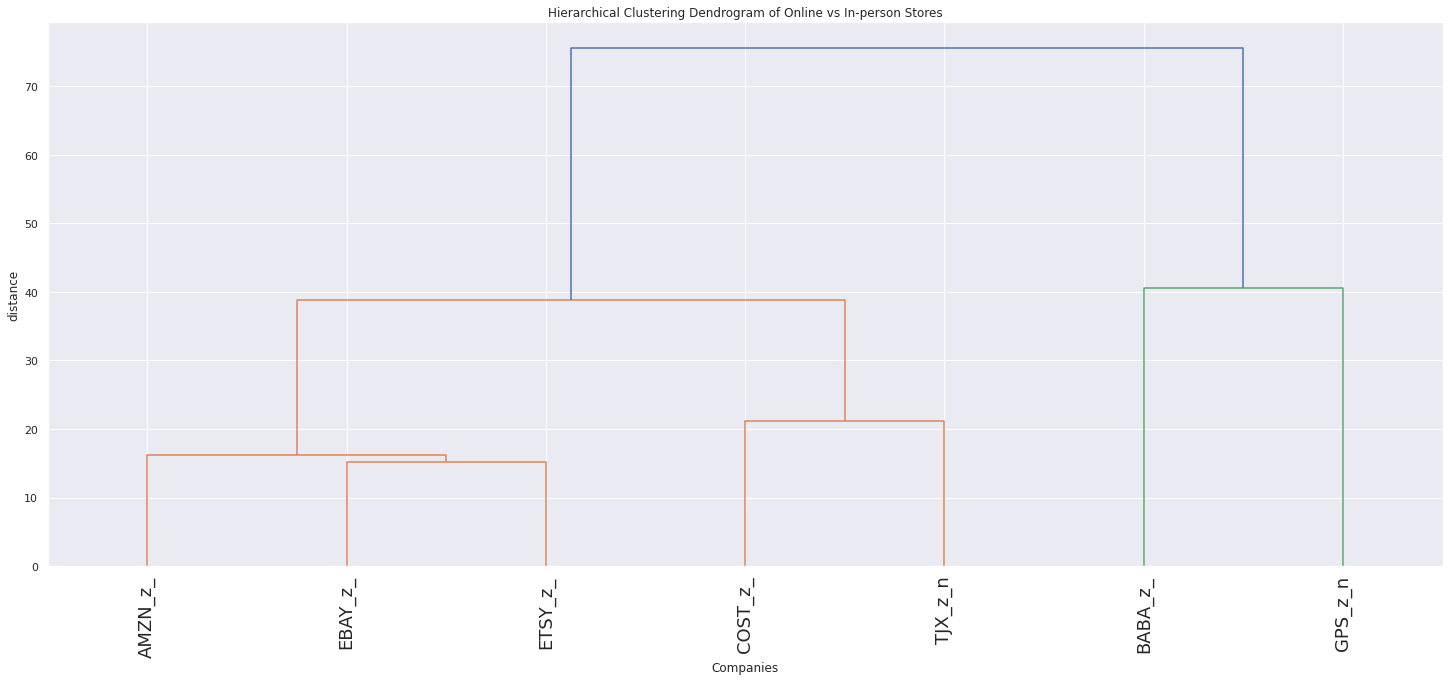

In [ ]:
Z = sch.linkage(TimeSeries.T, method='ward', metric='euclidean')

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of Online vs In-person Stores')
plt.xlabel('Companies')
plt.ylabel('distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
    labels=TimeSeries.columns
)
plt.show()